 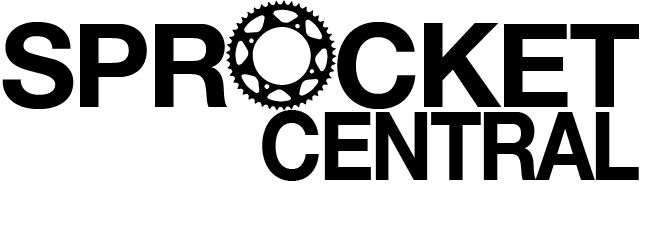

Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organisation needs help with its customer and transactions data. 


#### Goal: 
The organisation has a large dataset relating to its customers, and wants to effectively analyse it to help optimise its marketing strategy by analysing their existing customer dataset to determine customer trends and behaviour. 

Using the existing 3 datasets (Customer demographic, customer address and transactions) as a labelled dataset, recommend which of these 1000 new customers should be targeted to drive the most value for the organisation. 


#### Dataset:
The client provided 3 datasets:

- Customer Demographic 

- Customer Addresses

- Transactions data

#### Tasks to be performed:
To assess the quality of their data; as well as make recommendations on ways to clean the underlying data and mitigate these issues.

3 phases:
- Data Exploration

- Model Development 

- Interpretation.




In [1]:
import xlrd
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
file_name = 'Documents/KPMG_Analysis.xlsx'
print(pd.ExcelFile(file_name).sheet_names)

['Title Sheet', 'Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


### Reading data from each sheet in a file

In [4]:
# Reading data from Transactions

df_transactions = pd.read_excel(file_name, header=1, sheet_name='Transactions')
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [5]:
# Reading data from CustomerDemographics

df_custDemo = pd.read_excel(file_name, header=1, sheet_name='CustomerDemographic')
df_custDemo.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
# Reading data from Customer Address

df_custAddr = pd.read_excel(file_name, header=1, sheet_name='CustomerAddress')
df_custAddr.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [7]:
# Reading data from New customer list

df_custList = pd.read_excel(file_name, header=1, sheet_name='NewCustomerList')
df_custList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


### Cleaning Data sheet: Transactions

In [8]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [9]:
# Extracting required columns
df_transactions = df_transactions.iloc[:, 0:13]
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

#### Casting columns to appropriate data types

In [10]:
# Casting product_first_sold_date to date format.
df_transactions["product_first_sold_date"] = pd.to_datetime(df_transactions["product_first_sold_date"])


# Casting online_orde to str format.
df_transactions["online_order"]=df_transactions["online_order"].astype(str)

In [11]:
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226


#### Checking for NULL values

Few columns have the data type object, either because they contain values of different types or contain empty values (NaN).

It appears that few column contains some empty values since the Non-Null count for every column is lower than the total number of rows (20000). We'll need to deal with empty values and manually adjust the data type for each column on a case-by-case basis.

In [12]:
# Checking for null values
df_transactions.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

#### Checking for duplicate data

In [13]:
# Checking for duplicate values
df_transactions[df_transactions.duplicated()].sum()

transaction_id    0.0
product_id        0.0
customer_id       0.0
online_order      0.0
order_status      0.0
brand             0.0
product_line      0.0
product_class     0.0
product_size      0.0
list_price        0.0
standard_cost     0.0
dtype: float64

#### Check for uniqueness of each column

In [14]:
#check for uniqueness of each column
df_transactions.nunique()

transaction_id             20000
product_id                   101
customer_id                 3494
transaction_date             364
online_order                   3
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   296
standard_cost                103
product_first_sold_date      100
dtype: int64

#### Size of dataset

In [15]:
df_transactions.shape

(20000, 13)

#### Displaying value_counts for the columns

In [16]:
# Brand Column values
df_transactions['brand'].value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
Name: brand, dtype: int64

In [17]:
# profuct_line Column values
df_transactions['product_line'].value_counts()

Standard    14176
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [18]:
# product_class Column values
df_transactions['product_class'].value_counts()

medium    13826
high       3013
low        2964
Name: product_class, dtype: int64

In [19]:
# product_size Column values
df_transactions['product_size'].value_counts()

medium    12990
large      3976
small      2837
Name: product_size, dtype: int64

#### Let's now view some basic statistics about numeric columns

In [20]:
df_transactions.describe()

,transaction_id,product_id,customer_id,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,582.825242,405.955660
min,1.000000,0.00000,1.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,2091.470000,1759.850000


### Cleaning dataset CustomerDemographics

In [21]:
df_custDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

#### Extracting only the required columns

In [22]:
#Using only the required columns
# Discard Default column as it contains random data
a1=df_custDemo.iloc[:, 0:10]
b1=df_custDemo.iloc[:, 11:]
frames1 =[a1,b1]
df_custDemo= pd.concat(frames1, axis=1)
df_custDemo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [23]:
df_custDemo['deceased_indicator'].replace(['N'], 0, inplace=True)
df_custDemo['deceased_indicator'].replace(['Y'], 1, inplace=True)
df_custDemo['owns_car'].replace('Yes', 1, inplace=True)
df_custDemo['owns_car'].replace('No', 0, inplace=True)

In [24]:
# Inserting "age" column

df_custDemo["DOB"] = pd.to_datetime(df_custDemo["DOB"])

df_custDemo["age"] = df_custDemo["DOB"].apply(lambda x: (pd.datetime.now().year - x.year))

df_custDemo = df_custDemo[df_custDemo['age'] < 100]
df_custDemo.sort_values('age', ascending = False)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,0,0,6.0,92.0
1091,1092,Katlin,Creddon,Female,56,1935-08-22,VP Quality Control,Retail,Mass Customer,0,0,5.0,88.0
3409,3410,Merrili,Brittin,Female,93,1940-09-22,NaN,Property,Mass Customer,0,0,16.0,83.0
2412,2413,Abbey,Murrow,Male,27,1943-08-11,Environmental Specialist,Manufacturing,High Net Worth,0,1,17.0,80.0
657,658,Donn,Bonnell,Male,38,1944-01-24,Tax Accountant,Manufacturing,Affluent Customer,0,1,8.0,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2857,2858,Benedicto,Radki,Male,4,2002-01-09,Recruiting Manager,NaN,Mass Customer,0,1,1.0,21.0
65,66,Anselm,Gawne,Male,46,2002-03-11,Account Executive,Argiculture,High Net Worth,0,0,1.0,21.0
421,422,Vito,Norker,Male,78,2002-01-06,NaN,Manufacturing,Affluent Customer,0,0,1.0,21.0
3434,3435,Stevena,Allcock,Female,80,2002-01-15,Senior Editor,NaN,Affluent Customer,0,0,1.0,21.0


In [25]:
df_custDemo['age_class'] = ((round(df_custDemo['age'] / 10)) * 10).astype(int)
df_custDemo.head() 

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_class
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,43.0,40
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,0,1,15.0,69.0,70
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,0,7.0,62.0,60
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,0,1,8.0,46.0,50


#### Checking for null values

In [26]:
# Checking for null values
df_custDemo.isnull().sum()

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
age                                      0
age_class                                0
dtype: int64

#### Checking for duplicate values

In [27]:
# Checking for duplicate values
df_custDemo[df_custDemo.duplicated()].sum()

customer_id                            0.0
first_name                             0.0
last_name                              0.0
gender                                 0.0
past_3_years_bike_related_purchases    0.0
job_title                              0.0
job_industry_category                  0.0
wealth_segment                         0.0
deceased_indicator                     0.0
owns_car                               0.0
tenure                                 0.0
age                                    0.0
age_class                              0.0
dtype: float64

In [28]:
#check for uniqueness of each column
df_custDemo.nunique()

customer_id                            3912
first_name                             3078
last_name                              3646
gender                                    5
past_3_years_bike_related_purchases     100
DOB                                    3447
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
age                                      55
age_class                                 8
dtype: int64

#### Displaying value_counts for the columns

In [29]:
# Brand Column values
df_custDemo['gender'].value_counts()

Female    2037
Male      1872
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [30]:
# Replacing F and Femal with Female
df_custDemo['gender'] = df_custDemo['gender'].replace(['Femal', 'F'],'Female')
df_custDemo['gender'] = df_custDemo['gender'].replace(['M'],'Male')
df_custDemo['gender'] = df_custDemo['gender'].replace(['U'],'Undefined')
df_custDemo['gender'].value_counts()


Female    2039
Male      1873
Name: gender, dtype: int64

In [31]:
# job_industry_category Column values
df_custDemo['job_industry_category'].value_counts()

Manufacturing         796
Financial Services    767
Health                596
Retail                358
Property              267
IT                    151
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [32]:
# wealth_segment Column values
df_custDemo['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     962
Name: wealth_segment, dtype: int64

In [33]:
# deceased_indicator Column values
df_custDemo['deceased_indicator'].value_counts()

0    3910
1       2
Name: deceased_indicator, dtype: int64

In [34]:
# owns_car  Column values
df_custDemo['owns_car'].value_counts()

1    1974
0    1938
Name: owns_car, dtype: int64

In [35]:
#### Let's now view some basic statistics about numeric columns.

df_custDemo.describe()

,customer_id,past_3_years_bike_related_purchases,deceased_indicator,owns_car,tenure,age,age_class
count,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000,3912.000000
mean,1999.828221,49.039366,0.000511,0.504601,10.654652,45.935072,45.935583
std,1154.903377,28.768226,0.022608,0.500043,5.658898,12.617249,13.135174
min,1.000000,0.000000,0.000000,0.000000,1.000000,21.000000,20.000000
25%,1002.750000,24.000000,0.000000,0.000000,6.000000,36.000000,40.000000
50%,2000.000000,48.000000,0.000000,1.000000,11.000000,46.000000,50.000000
75%,2997.250000,73.000000,0.000000,1.000000,15.000000,55.000000,60.000000
max,4000.000000,99.000000,1.000000,1.000000,22.000000,92.000000,90.000000


### Cleaning Customer Address Dataset

In [36]:
df_custAddr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [37]:
# Checking for null values
df_custAddr.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [38]:
# Checking for duplicate values
df_custAddr[df_custAddr.duplicated()].sum()

customer_id           0.0
address               0.0
postcode              0.0
state                 0.0
country               0.0
property_valuation    0.0
dtype: float64

In [39]:
#check for uniqueness of each column
df_custAddr.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

#### Displaying value_counts for the column

In [40]:
# state Column values
df_custAddr['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [41]:
# Replacing strings New south wales with NSW
df_custAddr['state'] = df_custAddr['state'].replace(['New South Wales'],'NSW')

# Replacing strings Victoria with VIC
df_custAddr['state'] = df_custAddr['state'].replace(['Victoria'],'VIC')

df_custAddr['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

In [42]:
# country Column values
df_custAddr['country'].value_counts()

Australia    3999
Name: country, dtype: int64

In [43]:
# Checking uniqness against the modifications made.
df_custAddr.nunique()

customer_id           3999
address               3996
postcode               873
state                    3
country                  1
property_valuation      12
dtype: int64

In [44]:
df_custAddr.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


### Find Columns Shared By Two Data Frames

In [45]:
df_transactions.columns.intersection(df_custDemo.columns)

Index(['customer_id'], dtype='object')

In [46]:
df_transactions.columns.intersection(df_custAddr.columns)

Index(['customer_id'], dtype='object')

In [47]:
df_custDemo.columns.intersection(df_custAddr.columns)

Index(['customer_id'], dtype='object')

### Count Matching Values Between Columns

In [48]:
print("transactions:", df_transactions['customer_id'].nunique())
print("custDemo", df_custDemo['customer_id'].nunique())
print("custAddr", df_custAddr['customer_id'].nunique())

transactions: 3494
custDemo 3912
custAddr 3999


In [56]:
df_transactions['customer_id'].isin(df_custAddr['customer_id']).value_counts()

True     19968
False       32
Name: customer_id, dtype: int64

In [57]:
df_custDemo['customer_id'].isin(df_custAddr['customer_id']).value_counts()

True     3908
False       4
Name: customer_id, dtype: int64

### Cleaning New Customer List

In [58]:
df_custList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [59]:
#Using only the required columns
# Removing unnamed columns
b=df_custList.iloc[:,21:]
a=df_custList.iloc[:,0:16]
frames = [a,b]
df_custListM= pd.concat(frames, axis=1)
df_custListM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

## Merging dataframes

In [84]:
df_demo_addr = pd.merge(df_custDemo, df_custAddr, left_index=True, right_index=True)
df_demo_addr.head()

,customer_id_x,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,0,1,11.0,70.0,70,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,0,1,16.0,43.0,40,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,0,1,15.0,69.0,70,4,0 Holy Cross Court,4211,QLD,Australia,9
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,0,0,7.0,62.0,60,5,17979 Del Mar Point,2448,NSW,Australia,4
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,0,1,8.0,46.0,50,6,9 Oakridge Court,3216,VIC,Australia,9


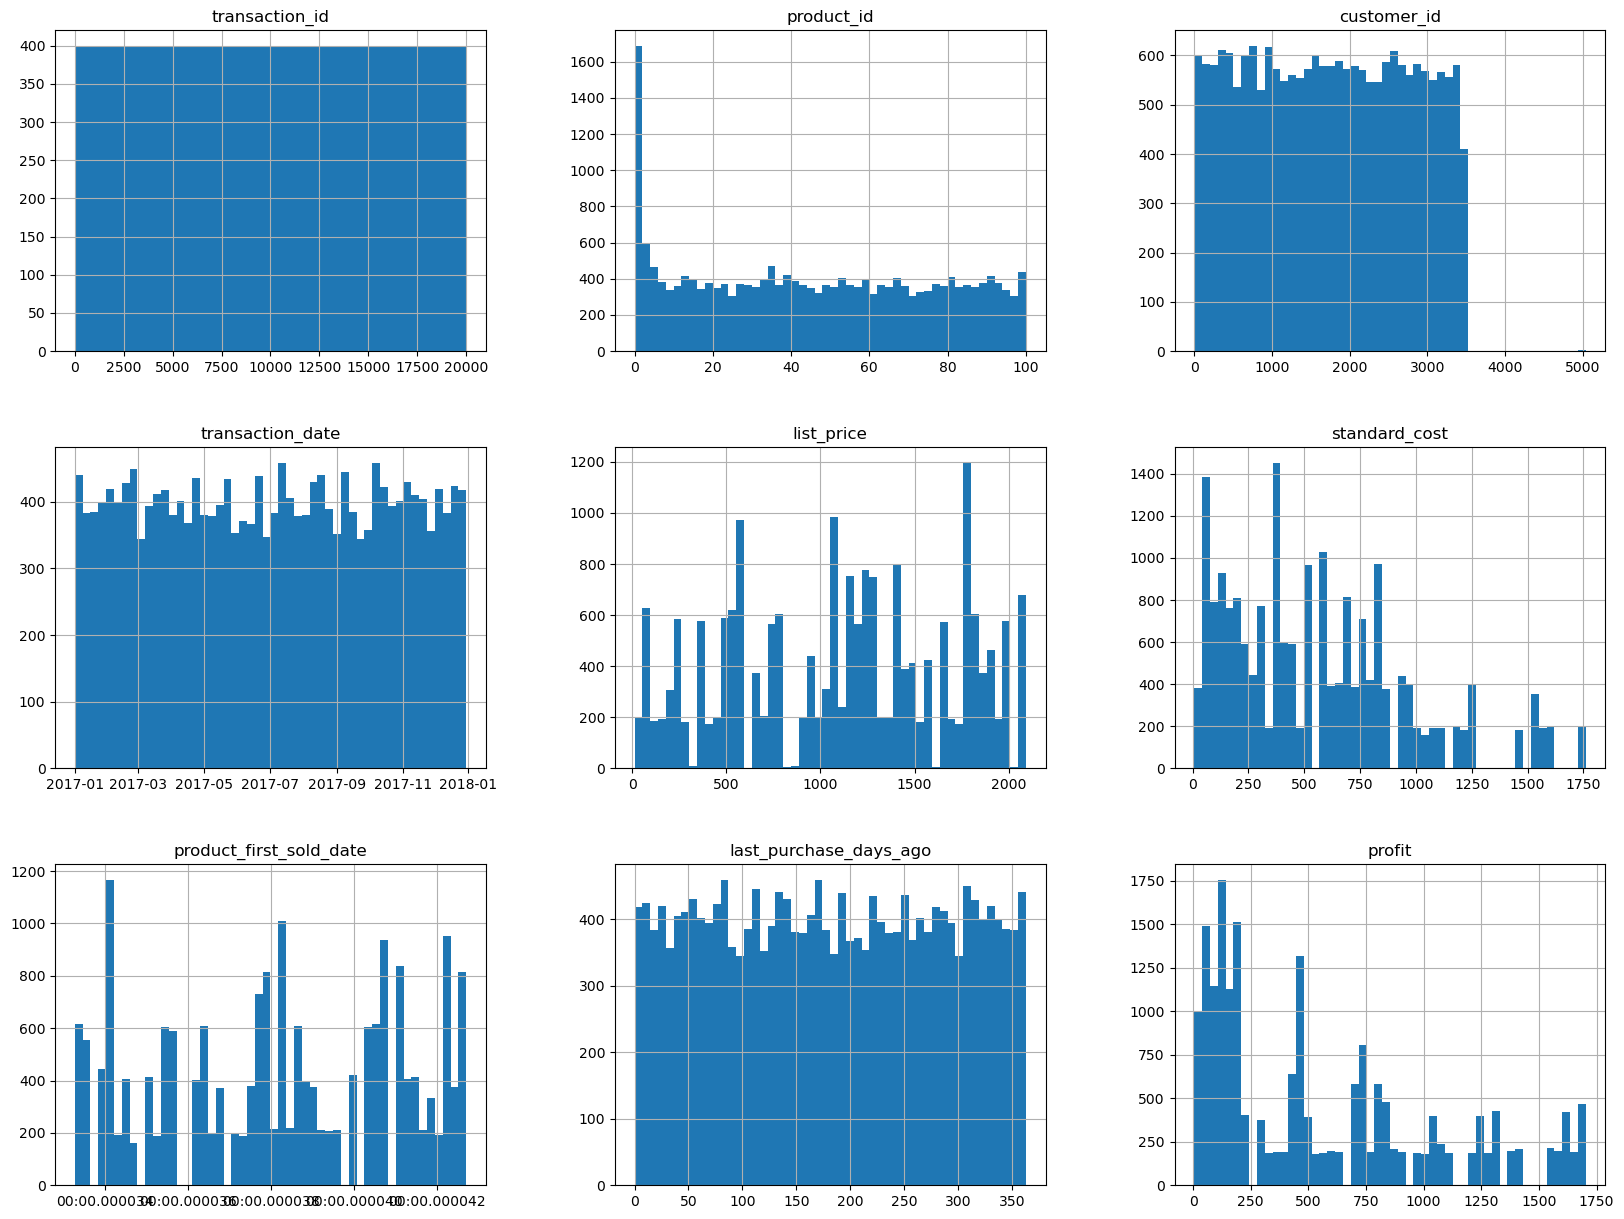

In [85]:
df_transactions.hist(bins=50, figsize=(20,15))
plt.show()

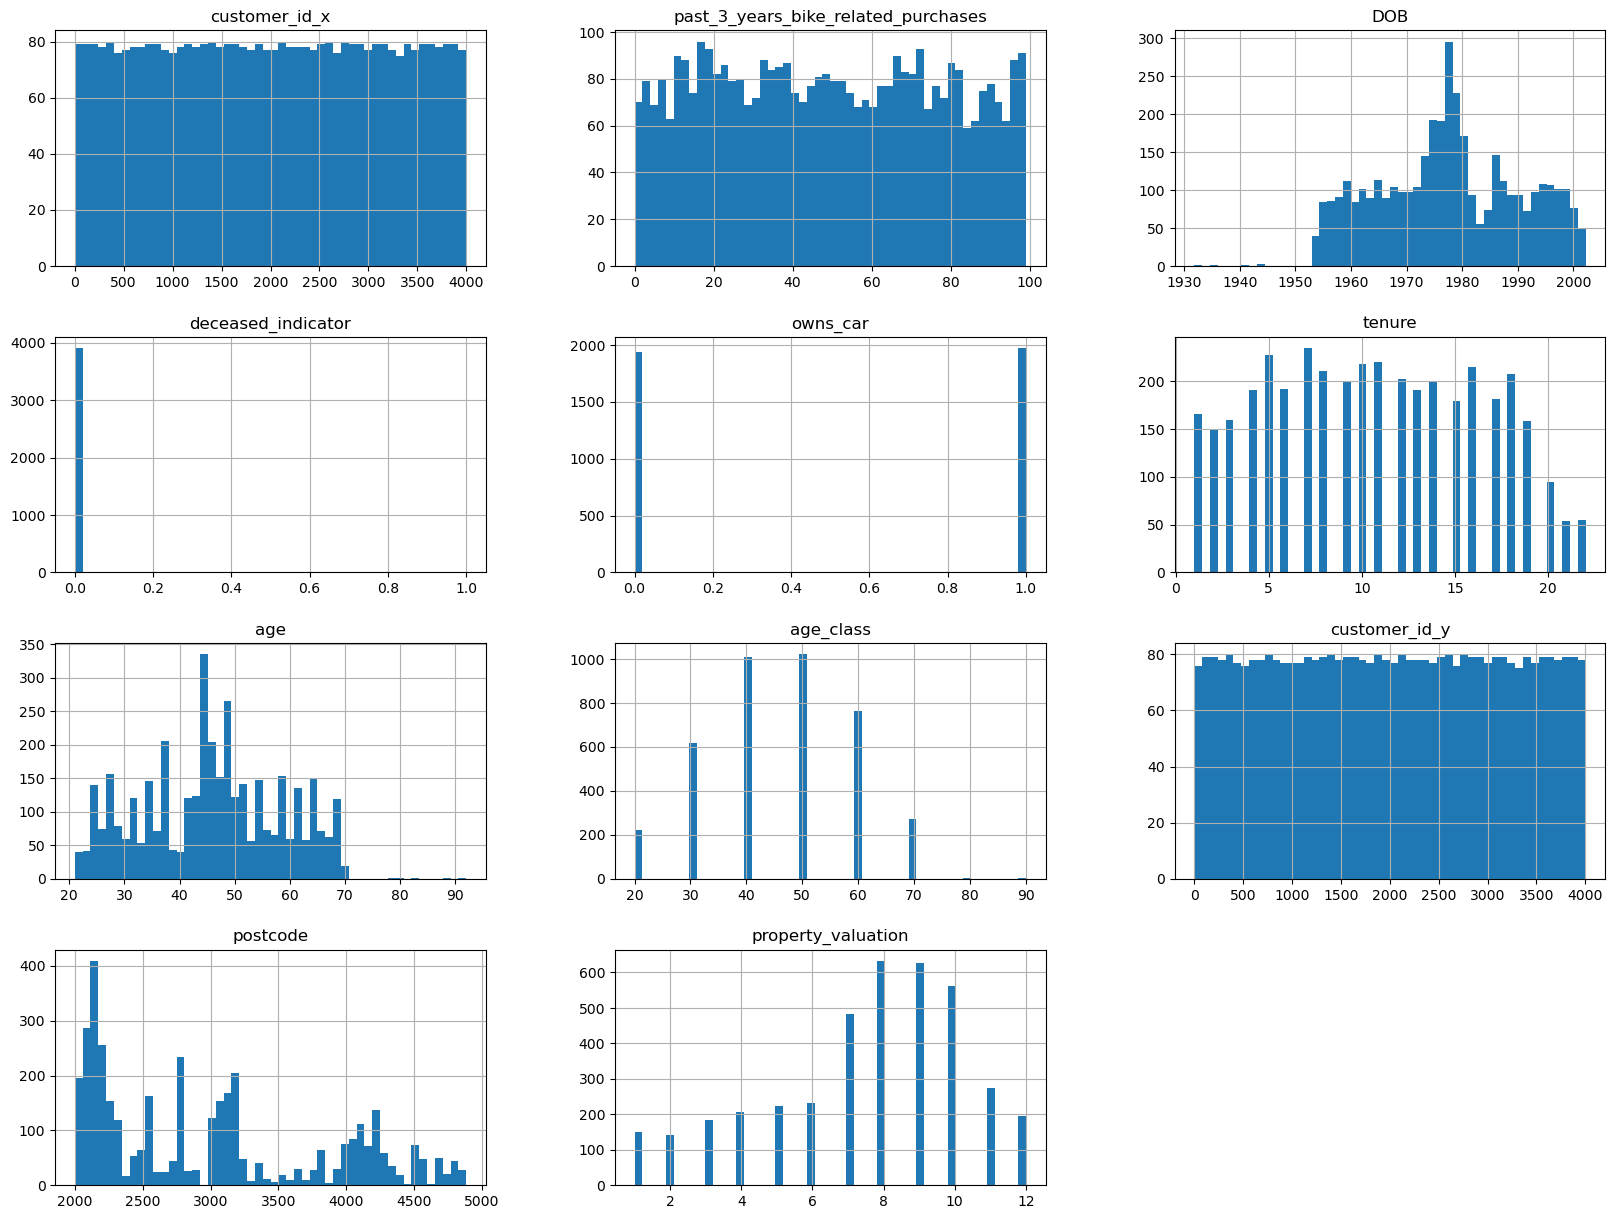

In [86]:
df_demo_addr.hist(bins=50, figsize=(20,15))
plt.show()

### Building RFM model

In [87]:
# Finding Recency of Purchase
most_recent_purchase = df_transactions['transaction_date'].max()

df_transactions['last_purchase_days_ago'] = most_recent_purchase - df_transactions['transaction_date']
df_transactions['last_purchase_days_ago'] /= np.timedelta64(1, 'D')
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,308.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,223.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,75.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,121.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,90.0,1055.82


In [88]:
# Finding Monetary Value by calculating Profit
df_transactions['profit'] = df_transactions['list_price'] - df_transactions['standard_cost']
df_transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,last_purchase_days_ago,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 00:00:00.000041245,308.0,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 00:00:00.000041701,223.0,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 00:00:00.000036361,75.0,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 00:00:00.000036145,121.0,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 00:00:00.000042226,90.0,1055.82


In [89]:
rfmTable = df_transactions.groupby('customer_id').agg({
    'last_purchase_days_ago': lambda x: x.min(),
    'customer_id': lambda x: len(x),
    'profit': lambda x: x.sum()
})

rfmTable.rename(columns={
    'last_purchase_days_ago': 'recency', 
    'customer_id': 'frequency', 
    'profit': 'monetary_value'
    }, inplace=True
)

rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7.0,11,3018.09
2,128.0,3,2226.26
3,102.0,8,3362.81
4,195.0,2,220.57
5,16.0,6,2394.94


In [90]:
rfmTable.shape

(3494, 3)

In [91]:
quartiles = rfmTable.quantile(q=[0.2, 0.4, 0.6, 0.8])
quartiles

,recency,frequency,monetary_value
0.2,14.0,4.0,1618.830
0.4,32.0,5.0,2463.940
0.6,58.0,6.0,3354.942
0.8,98.0,8.0,4572.314


In [92]:
def R_score(x, p, d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]: 
        return 2
    else: 
        return 1
    
def FM_score(x, p, d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]: 
        return 4
    else: 
        return 5


In [93]:
rfmSeg = rfmTable
rfmSeg['r_score'] = rfmSeg['recency'].apply(R_score, args=('recency', quartiles))
rfmSeg['f_score'] = rfmSeg['frequency'].apply(FM_score, args=('frequency', quartiles))
rfmSeg['m_score'] = rfmSeg['monetary_value'].apply(FM_score, args=('monetary_value', quartiles))
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score
customer_id,,,,,,
1,7.0,11,3018.09,5,5,3
2,128.0,3,2226.26,1,1,2
3,102.0,8,3362.81,1,4,4
4,195.0,2,220.57,1,1,1
5,16.0,6,2394.94,4,3,2


In [94]:
rfmSeg['rfm_score'] = 100 * rfmSeg['r_score'] + 10 * rfmSeg['f_score'] + rfmSeg['m_score']
#rfmSeg['total_score'] = rfmSeg['r_score'] + rfmSeg['f_score'] + rfmSeg['m_score']
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_score
customer_id,,,,,,,
1,7.0,11,3018.09,5,5,3,553
2,128.0,3,2226.26,1,1,2,112
3,102.0,8,3362.81,1,4,4,144
4,195.0,2,220.57,1,1,1,111
5,16.0,6,2394.94,4,3,2,432


The RFM scores give us 5^3 = 125 segments. Which is not easy to work with.

Hence, customers are divided into 11 segments based on the R and F scores. 

    Champions---------------------- Bought recently, buy often and spend the most
    Loyal Customers---------------- Buy on a regular basis. Responsive to promotions.
    Potential Loyalist------------- Recent customers with average frequency.
    Recent Customers--------------- Bought most recently, but not often.
    Promising---------------------- Recent shoppers, but haven’t spent much.
    Customers Needing Attention---- Above average recency, frequency and monetary values. May not have bought very recently 
    About To Sleep-----------------	Below average recency and frequency. Will lose them if not reactivated.
    At Risk----------------------- 	Purchased often but a long time ago. Need to bring them back!
    Can’t Lose Them----------------	Used to purchase frequently but haven’t returned for a long time.
    Hibernating-------------------- Last purchase was long back and low number of orders. May be lost.
    
#### Champion
555, 554, 544, 545, 454, 455, 445.

#### Loyal Customer
543, 444, 435, 355, 354, 345, 344, 335.

#### Potential Loyalist
553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323.

#### New Customer
512, 511, 422, 421 412, 411, 311.

#### Promising
525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313.

#### Need Attention
535, 534, 443, 434, 343, 334, 325, 324.

#### Cannot Lose Them
155, 154, 144, 214,215,115, 114, 113 .

#### About To Sleep
331, 321, 312, 221, 213.

#### At Risk
255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124.

#### Hibernating
332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211.

#### Lost
111, 112, 121, 131, 141, 151.

In [95]:
''' segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}
'''



rfmSeg['Segment'] = rfmSeg['r_score'].map(str) + rfmSeg['f_score'].map(str) + rfmSeg['m_score'].map(str)


rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['555', '554', '544', '545', '454', '455', '445'], value = "Champion")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['543', '444', '435', '355', '354', '345', '344', '335'], value = "Loyal Customer")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['553', '551', '552', '541', '542', '533', '532', '531', '452', '451', '442', '441', '431', '453', '433', '432', '423', '353', '352', '351', '342', '341', '333', '323'], value = "Potential Loyalist")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['512', '511', '422', '421', '412', '411', '311'], value = "New Customer")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['525', '524', '523', '522', '521', '515', '514', '513', '425', '424', '413', '414', '415', '315', '314', '313'], value = "Promising")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['535', '534', '443', '434', '343', '334', '325', '324'], value = "Need Attention")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['155', '154', '144', '214', '215', '115', '114', '113'], value = "Cannot Lose Them")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['331', '321', '312', '221', '213'], value = "About To Sleep")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['255', '254', '245', '244', '253', '252', '243', '242', '235', '234', '225', '224', '153', '152', '145', '143', '142', '135', '134', '133', '125', '124'], value = "At Risk")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['332', '322', '231', '241', '251', '233', '232', '223', '222', '132', '123', '122', '212', '211'], value = "Hibernating")
rfmSeg['Segment'] = rfmSeg['Segment'].replace(to_replace = ['553', '112', '121', '131', '141', '151', '111'], value = "Lost")
rfmSeg.head()

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_score,Segment
customer_id,,,,,,,,
1,7.0,11,3018.09,5,5,3,553,Potential Loyalist
2,128.0,3,2226.26,1,1,2,112,Lost
3,102.0,8,3362.81,1,4,4,144,Cannot Lose Them
4,195.0,2,220.57,1,1,1,111,Lost
5,16.0,6,2394.94,4,3,2,432,Potential Loyalist


In [96]:
rfmSeg['Segment'].value_counts()

Hibernating           451
At Risk               439
Champion              422
Potential Loyalist    372
New Customer          359
Lost                  343
Loyal Customer        343
Promising             263
Need Attention        221
About To Sleep        148
Cannot Lose Them      133
Name: Segment, dtype: int64

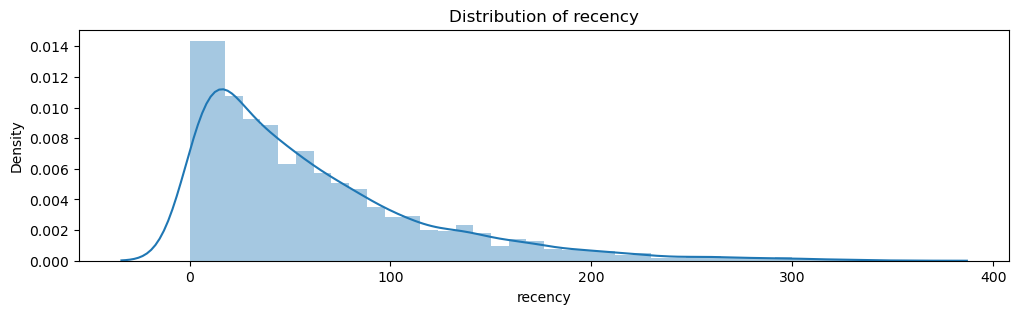

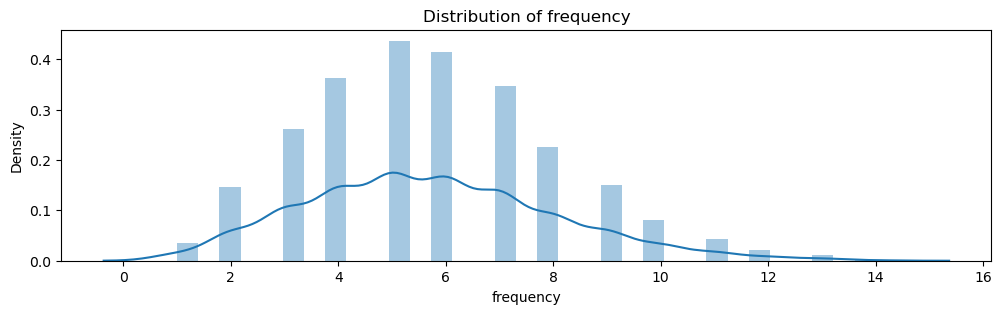

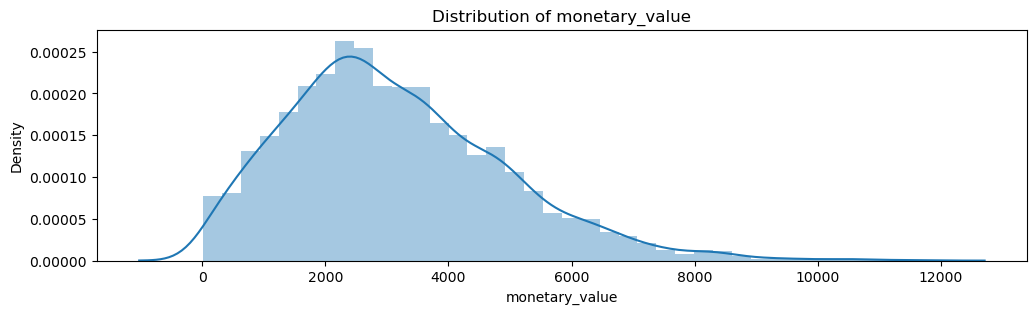

In [97]:
colnames = ['recency', 'frequency', 'monetary_value']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfmSeg[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

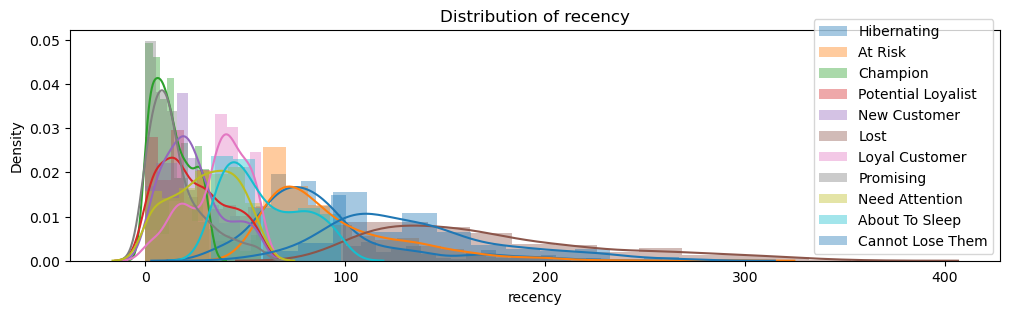

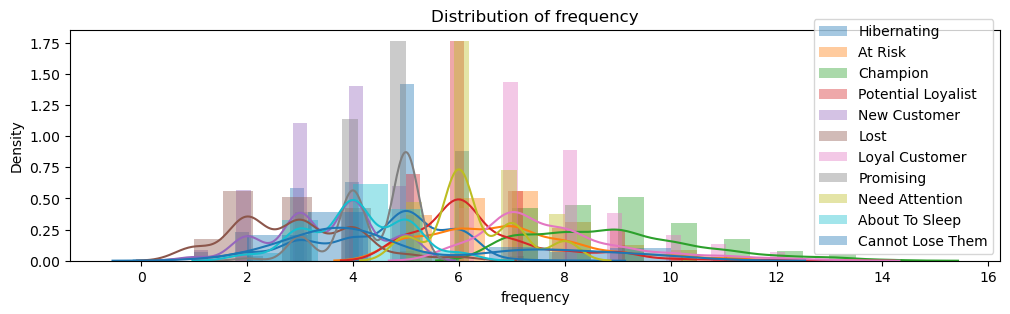

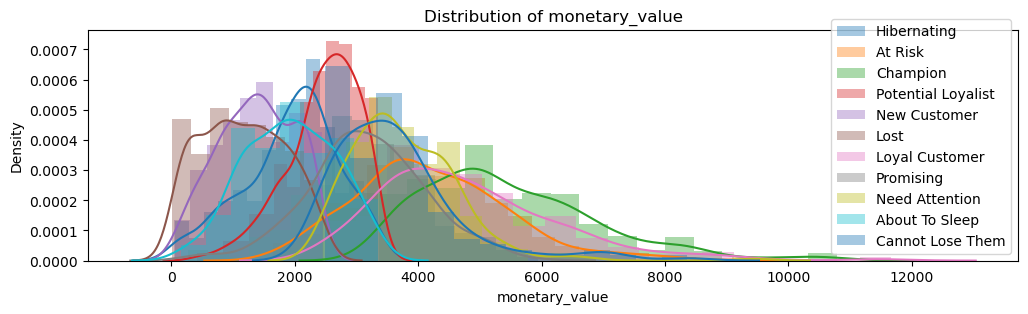

In [98]:
segments = ['Hibernating','At Risk','Champion','Potential Loyalist','New Customer','Lost','Loyal Customer','Promising',\
            'Need Attention','About To Sleep','Cannot Lose Them']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    for segment in segments:
        sns.distplot(rfmSeg[rfmSeg['Segment']==segment][col], label=segment)
    ax.set_title('Distribution of %s' % col)
    plt.legend()
    plt.show()

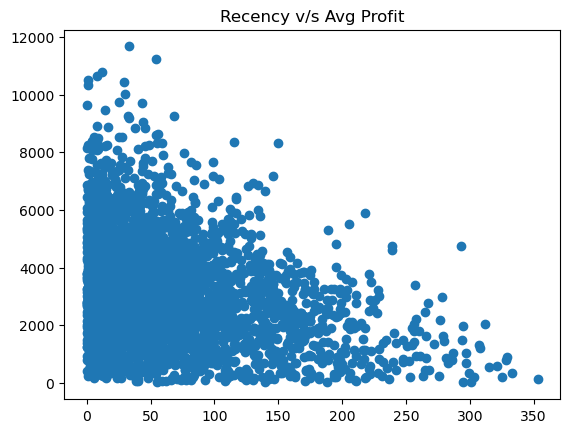

In [102]:
plt.scatter(rfmSeg['recency'], rfmSeg['monetary_value'])
plt.title('Recency v/s Avg Profit')
plt.show()

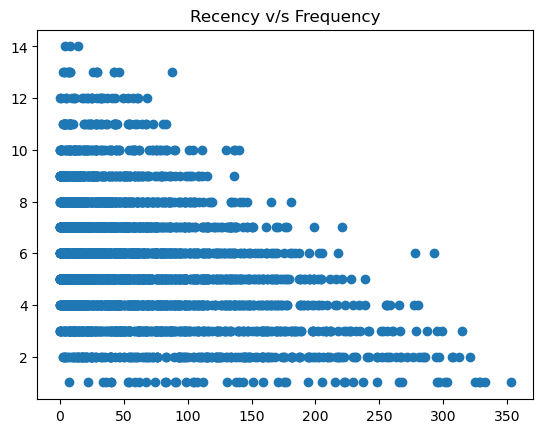

In [103]:
plt.scatter(rfmSeg['recency'], rfmSeg['frequency'])
plt.title('Recency v/s Frequency')
plt.show()

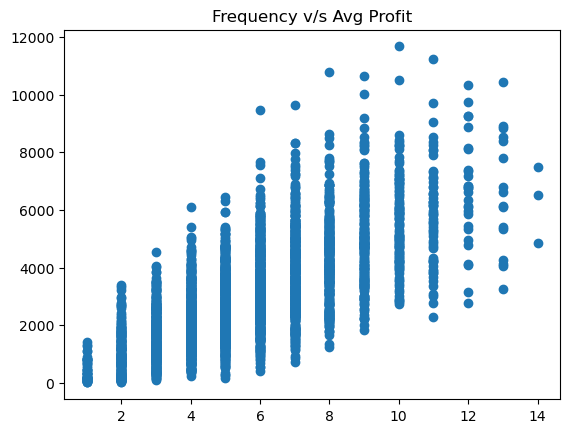

In [104]:
plt.scatter(rfmSeg['frequency'], rfmSeg['monetary_value'])
plt.title('Frequency v/s Avg Profit')
plt.show()

In [105]:
rfm_quartiles = (rfmSeg['rfm_score'].quantile(q=0.2), 
                 rfmSeg['rfm_score'].quantile(q=0.4),
                 rfmSeg['rfm_score'].quantile(q=0.6), 
                 rfmSeg['rfm_score'].quantile(q=0.8)
                )

rfm_quartiles

(211.0, 311.0, 411.0, 511.0)

### Merging Segmentation Table with Customer Demographics Table

In [110]:
addr_demo_txns = pd.merge(rfmSeg, df_demo_addr, left_index=True, right_index=True)
addr_demo_txns.columns

Index(['recency', 'frequency', 'monetary_value', 'r_score', 'f_score',
       'm_score', 'rfm_score', 'Segment', 'customer_id_x', 'first_name',
       'last_name', 'gender', 'past_3_years_bike_related_purchases', 'DOB',
       'job_title', 'job_industry_category', 'wealth_segment',
       'deceased_indicator', 'owns_car', 'tenure', 'age', 'age_class',
       'customer_id_y', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

<AxesSubplot:xlabel='m_score'>

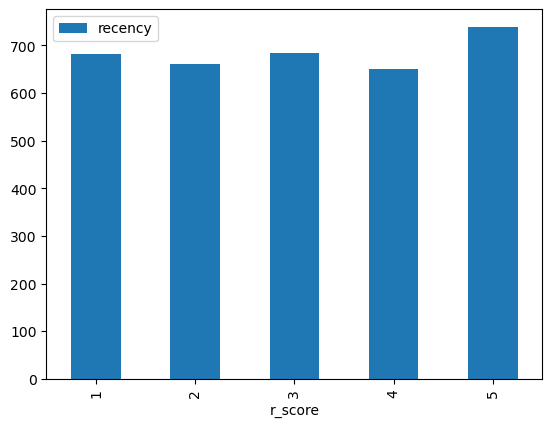

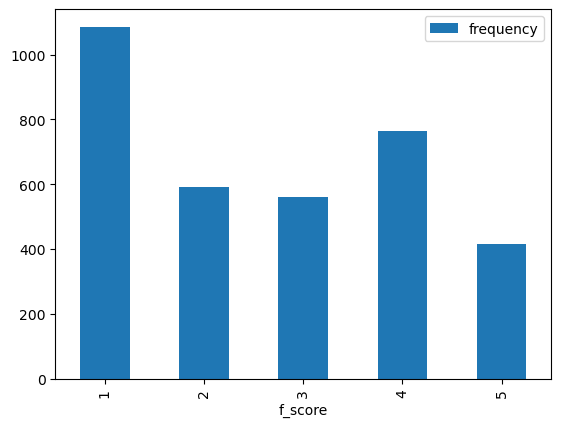

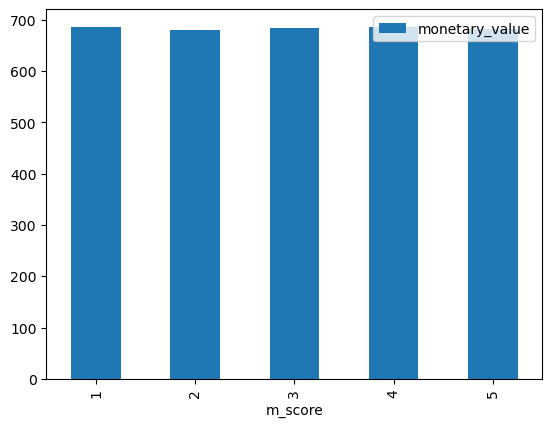

In [111]:
addr_demo_txns.groupby('r_score').agg('recency').count().to_frame().plot(kind='bar')
addr_demo_txns.groupby('f_score').agg('frequency').count().to_frame().plot(kind='bar')
addr_demo_txns.groupby('m_score').agg('monetary_value').count().to_frame().plot(kind='bar')

### - Number of customers in each segment category

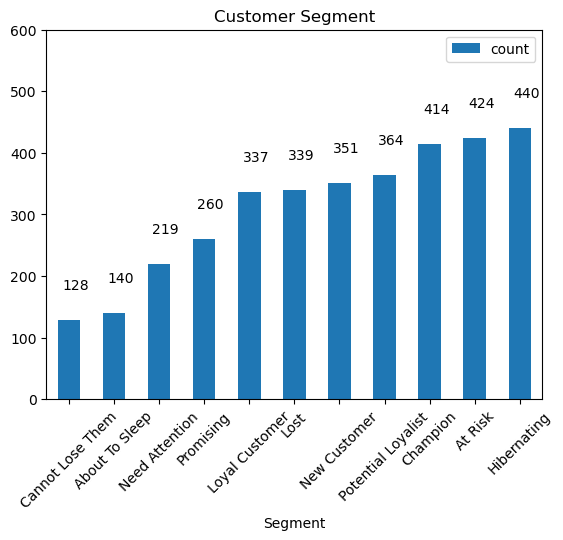

In [254]:
#Aggregate Segments based on rfm_score
customer_titles_df = addr_demo_txns.groupby('Segment').agg({
    'rfm_score': lambda x: len(x)
})

# Renaming rfm_Score by count
customer_titles_df.rename(columns={'rfm_score': 'count'}, inplace=True)

#Plotting bar chart
customer_titles_df.sort_values('count').plot(kind='bar')

#Display value in each bar
for i, v in enumerate(customer_titles_df.sort_values('count')['count']):
    plt.text(i - .15, v + 50 , int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 600])
plt.title('Customer Segment')
plt.xticks(rotation=45)
plt.show()

Majority of the customers falls under Hibernating, At risk and Champions segments.

In [193]:
e_cust = addr_demo_txns.loc[addr_demo_txns['Segment'].isin(['Champion','Potential Loyalist','Loyal Customer', 'Promising'])]
e_cust

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_score,Segment,customer_id_x,first_name,...,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
1,7.0,11,3018.09,5,5,3,553,Potential Loyalist,2,Eli,...,1,16.0,43.0,40,2,6 Meadow Vale Court,2153,NSW,Australia,10
5,16.0,6,2394.94,4,3,2,432,Potential Loyalist,6,Curr,...,1,13.0,57.0,60,7,4 Delaware Trail,2210,NSW,Australia,9
8,22.0,10,7066.94,4,5,5,455,Champion,9,Mala,...,1,8.0,50.0,50,11,93405 Ludington Park,3044,VIC,Australia,8
13,27.0,7,4337.38,4,4,4,444,Loyal Customer,14,Rayshell,...,0,6.0,40.0,40,16,52 Moland Street,3331,VIC,Australia,4
17,0.0,5,2015.61,5,2,2,522,Promising,18,Marjie,...,0,11.0,56.0,60,20,032 Bartelt Crossing,2444,NSW,Australia,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3485,25.0,3,2491.47,4,1,3,413,Promising,3486,Reece,...,0,18.0,67.0,70,3490,3609 Shelley Road,2126,NSW,Australia,10
3486,9.0,4,2972.34,5,1,3,513,Promising,3487,Amalee,...,0,18.0,46.0,50,3491,82 Dahle Crossing,3195,VIC,Australia,10
3494,4.0,4,2755.11,5,1,3,513,Promising,3495,Constantine,...,0,8.0,36.0,40,3499,310 Stephen Terrace,4073,QLD,Australia,9
3495,13.0,7,3847.65,5,4,4,544,Champion,3496,Danya,...,1,19.0,37.0,40,3500,9491 Green Ridge Terrace,2100,NSW,Australia,10


### - Which Gender made the highest bike related purchases in past 3 years?

AttributeError: 'AxesSubplot' object has no attribute 'plt'

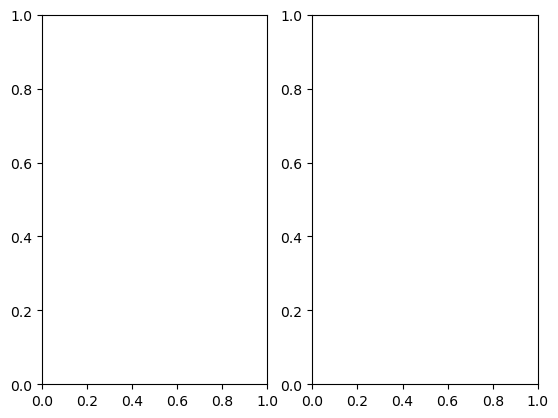

In [263]:
#plt.figure(figsize=(5,5))
c= addr_demo_txns.groupby(['gender'])['past_3_years_bike_related_purchases'].sum().rename('count').to_frame()

fig, (ax1, ax2) = plt.subplots(1, 2)
labels = ['Female', 'Male']
ax1.plt.bar(labels, c['count'], color=['red','blue'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related purchases by Gender')
plt.show()

labels = ['Female', 'Male']
ax2.plt.bar(labels, c['count'], color=['red','blue'])
for i, v in enumerate(c['count']):
    plt.text(i - .1, v - 10e3, v, color='white', fontweight='bold')
plt.title('Recent Bike Related purchases by Gender')
plt.show()

Females as compared to Male made the highest bike related purchases in past 3 years.

### - Which industry category has the highest number of customers?

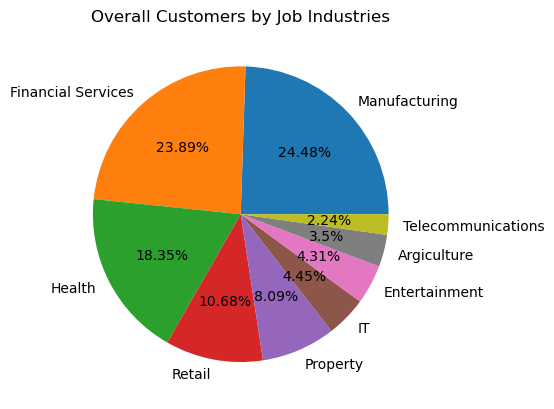

In [207]:
addr_demo_txns.job_industry_category.value_counts().plot.pie(autopct=lambda pct: str(round(pct, 2)) + '%')
plt.title('Overall Customers by Job Industries')
plt.ylabel('')
plt.show()

Marketing, Financial Services and Health industry has the highest number of customers purchasing bike and its accessories.

### Which age class and wealth segment makes highest bike related purchases?

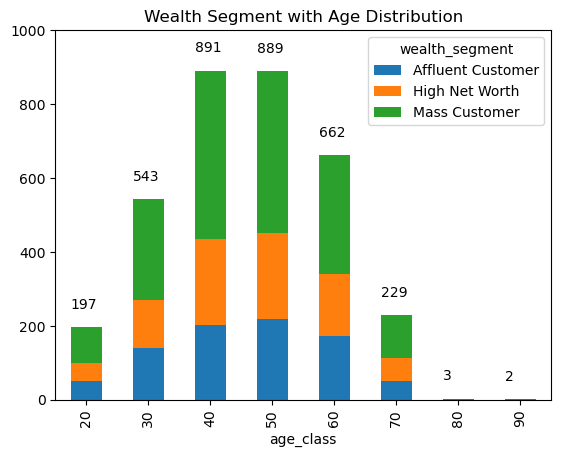

In [208]:
addr_demo_txns.groupby('age_class')['wealth_segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'wealth_segment': lambda x: len(x)})['wealth_segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Wealth Segment with Age Distribution')
plt.show()

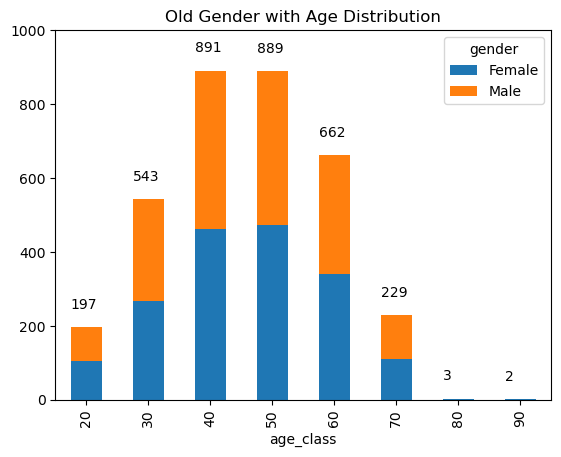

In [390]:
addr_demo_txns.groupby('age_class')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Gender with Age Distribution')
plt.show()

Mass Customers between the age of 40 and 50 irrespective of their genders makes highest bike related purchases.

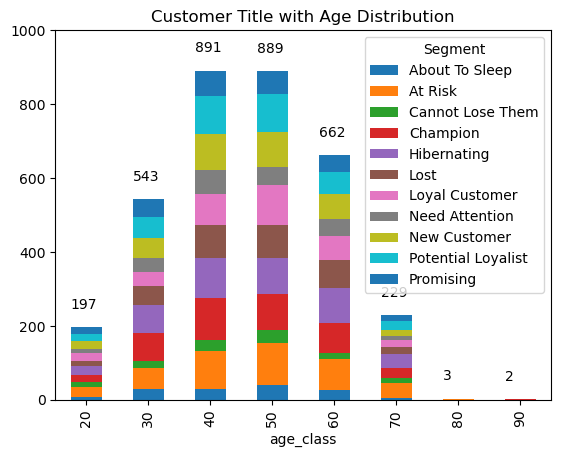

In [394]:
addr_demo_txns.groupby('age_class')['Segment'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class') \
                      .agg({'Segment': lambda x: len(x)})['Segment']):
    plt.text(i - .25, v + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Customer Title with Age Distribution')
plt.show()

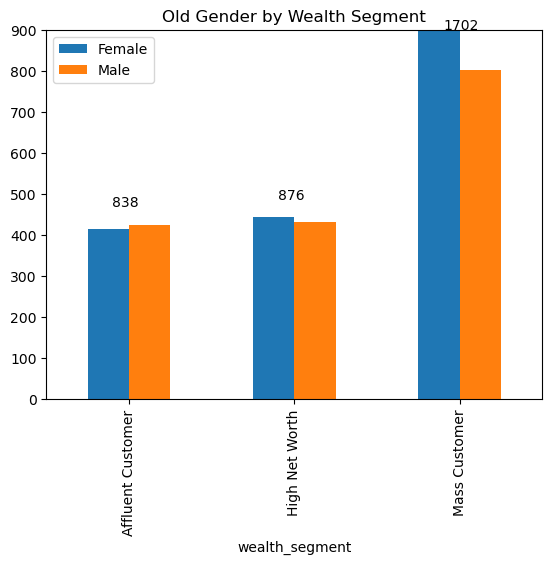

In [209]:
addr_demo_txns.groupby('wealth_segment')['gender'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('wealth_segment') \
                      .agg({'gender': lambda x: len(x)})['gender']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Gender by Wealth Segment')
plt.legend(['Female', 'Male'], loc='upper left')
plt.show()


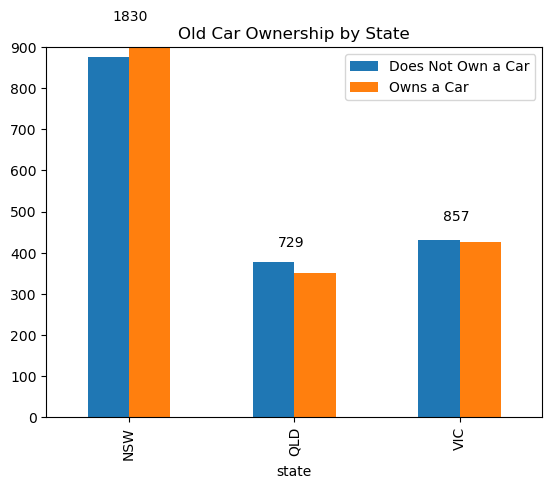

In [210]:
addr_demo_txns.groupby('state')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('state') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(i - .1, v // 2 + 50, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 900])
plt.title('Old Car Ownership by State')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()


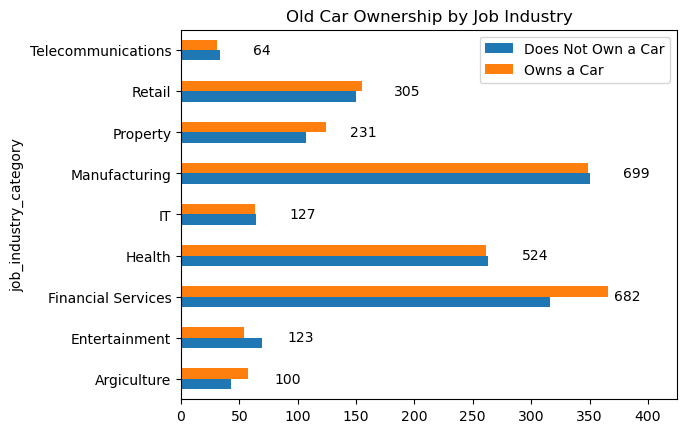

In [145]:
addr_demo_txns.groupby('job_industry_category')['owns_car'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.barh(stacked=False)
for i, v in enumerate(addr_demo_txns.groupby('job_industry_category') \
                      .agg({'owns_car': lambda x: len(x)})['owns_car']):
    plt.text(v // 2 + 30, i - .1, int(v), color='black')
axes = plt.gca()
axes.set_xlim([0,425])
plt.title('Old Car Ownership by Job Industry')
plt.legend(['Does Not Own a Car', 'Owns a Car'], loc='upper right')
plt.show()

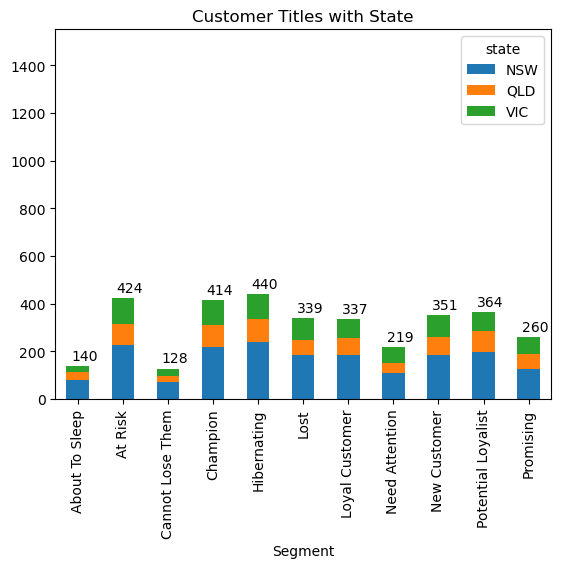

In [146]:
addr_demo_txns.groupby('Segment')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('Segment') \
                      .agg({'state': lambda x: len(x)})['state']):
    plt.text(i - .15, v + 25, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1550])
plt.title('Customer Titles with State')
plt.show()

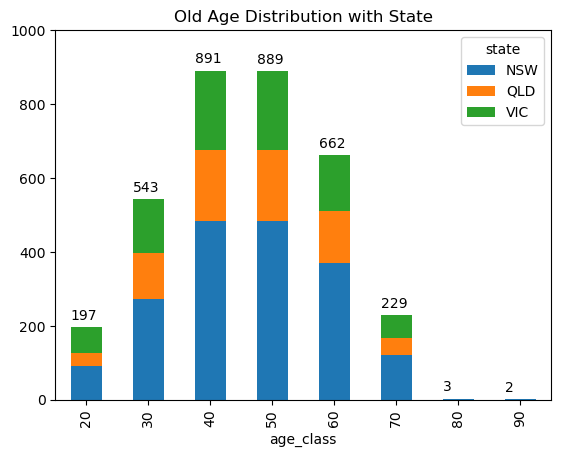

In [147]:
addr_demo_txns.groupby('age_class')['state'] \
    .value_counts() \
    .unstack(level=1) \
    .plot.bar(stacked=True)
for i, v in enumerate(addr_demo_txns.groupby('age_class').agg({'age': lambda x: len(x)})['age']):
    plt.text(i - .25, v + 20, int(v), color='black')
axes = plt.gca()
axes.set_ylim([0, 1000])
plt.title('Old Age Distribution with State')
plt.show()


In [148]:
customers = addr_demo_txns.groupby('Segment').agg({'age': lambda x: len(x)})
customers.rename(columns={'age':'count'},inplace=True)
customers['count'] = customers['count'].astype(int)
customers

,count
Segment,
About To Sleep,140
At Risk,424
Cannot Lose Them,128
Champion,414
Hibernating,440
Lost,339
Loyal Customer,337
Need Attention,219
New Customer,351


In [159]:
customers_state = addr_demo_txns.groupby(['state','Segment']).agg({'age': lambda x: len(x)}).reset_index()
customers_state.rename(columns={'age':'count'},inplace=True)
customers_state['count'] = customers_state['count'].astype(int)
customers_state

,state,Segment,count
0,NSW,About To Sleep,82
1,NSW,At Risk,228
2,NSW,Cannot Lose Them,72
3,NSW,Champion,219
4,NSW,Hibernating,240
5,NSW,Lost,184
6,NSW,Loyal Customer,185
7,NSW,Need Attention,111
8,NSW,New Customer,184
9,NSW,Potential Loyalist,198


(0.0, 200.0)

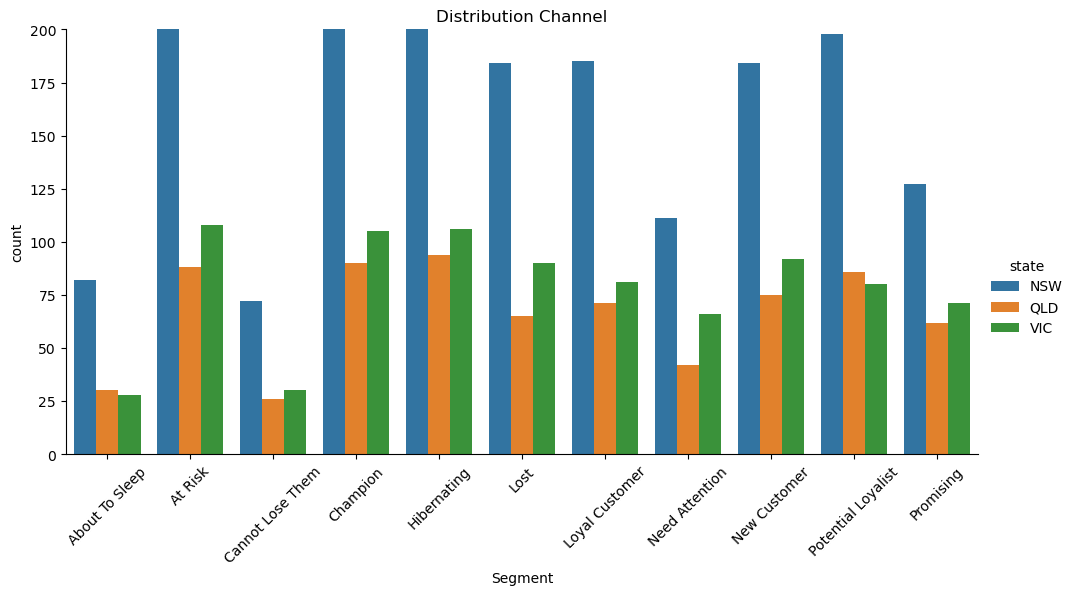

In [162]:

g = sns.catplot(x='Segment',y='count',hue='state',kind='bar',data=customers_state,height=5,aspect=2)
plt.title("Distribution Channel",fontdict={'fontsize':12})
plt.xticks(rotation=45)
g.ax.set_ylim(0,200)


In [150]:
top_1000 = addr_demo_txns.sort_values('rfm_score', ascending=False).head(1000)
top_1000

,recency,frequency,monetary_value,r_score,f_score,m_score,rfm_score,Segment,customer_id_x,first_name,...,owns_car,tenure,age,age_class,customer_id_y,address,postcode,state,country,property_valuation
2149,11.0,9,5077.10,5,5,5,555,Champion,2150,Huntlee,...,1,8.0,64.0,60,2154,0799 Florence Street,2089,NSW,Australia,9
2659,0.0,12,8143.93,5,5,5,555,Champion,2660,Hunt,...,1,19.0,60.0,60,2664,359 Briar Crest Road,2155,NSW,Australia,10
2747,14.0,9,6371.15,5,5,5,555,Champion,2748,Dolorita,...,0,4.0,56.0,60,2752,79 Eggendart Trail,3977,VIC,Australia,8
669,8.0,11,5513.28,5,5,5,555,Champion,670,Janifer,...,0,8.0,31.0,30,674,8 Lawn Hill,3752,VIC,Australia,7
2761,7.0,9,5082.02,5,5,5,555,Champion,2762,Rozamond,...,0,9.0,31.0,30,2766,95 Meadow Valley Plaza,2203,NSW,Australia,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2916,24.0,7,2509.80,4,4,3,443,Need Attention,2917,Siegfried,...,0,18.0,47.0,50,2921,210 Prairie Rose Hill,4060,QLD,Australia,9
314,20.0,8,3200.15,4,4,3,443,Need Attention,315,Lisa,...,0,12.0,65.0,60,319,93 American Ash Avenue,2747,NSW,Australia,8
2988,32.0,8,3034.97,4,4,3,443,Need Attention,2989,Mort,...,1,2.0,23.0,20,2993,00 Cordelia Trail,2138,NSW,Australia,9
923,32.0,7,3337.16,4,4,3,443,Need Attention,924,Clementius,...,0,13.0,47.0,50,928,730 Dixon Place,3158,VIC,Australia,8


In [151]:
writer = pd.ExcelWriter('kpmg_cleaned_data.xlsx',
                        engine = 'xlsxwriter')
addr_demo_txns.to_excel(writer, sheet_name = 'Dataset')
top_1000.to_excel(writer, sheet_name = 'Top 1000')
writer.save()
writer.close()